In [1]:
# Analysis lib
import numpy as np 
import pandas as pd 

In [2]:
# Reading data
listings_dataFilter = pd.read_csv('..\dataset_filter\listings.csv')
listings_dataFilter.shape

(3818, 92)

In [3]:
#Check for columns infomation
listings_dataFilter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   float64
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

# There are two types of data, one is Categorical and the other is Numerical. Numerical data includes int64 and float64.

# Drop "id" "host_id" "srape_id", these numerical data contains very big numerical value.

In [4]:
listings_dataFilter.drop(columns=['id', 'host_id', 'scrape_id'], inplace=True)

# Remove Columns contain only one value
## These columns won’t be useful for the model since they don’t add any information. In addition, removing these columns will reduce the number of columns we’ll need to explore further in the next stage.

In [5]:
listings_dataFilter = listings_dataFilter.loc[:,listings_dataFilter.apply(pd.Series.nunique) != 1]
listings_dataFilter.shape

(3818, 80)

# Maybe not useful for now??
## Check unbalanced data in every column, which only contains less than 4 unique values.(the columns contain 1 unique value has been dropped above)

In [6]:
listings_unbalanced = listings_dataFilter.loc[:,listings_dataFilter.apply(pd.Series.nunique) < 3]
listings_unbalanced = listings_unbalanced.drop(columns=['license'])
listings_unbalanced.head()

,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,state,is_location_exact,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,100%,f,t,t,WA,t,f,f,f
1,100%,t,t,t,WA,t,f,t,t
2,100%,f,t,t,WA,t,f,f,f
3,NaN,f,t,t,WA,t,f,f,f
4,NaN,f,t,t,WA,t,f,f,f


In [7]:
listings_unbalanced.columns

lengh is 9


Index(['host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'state', 'is_location_exact',
       'instant_bookable', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

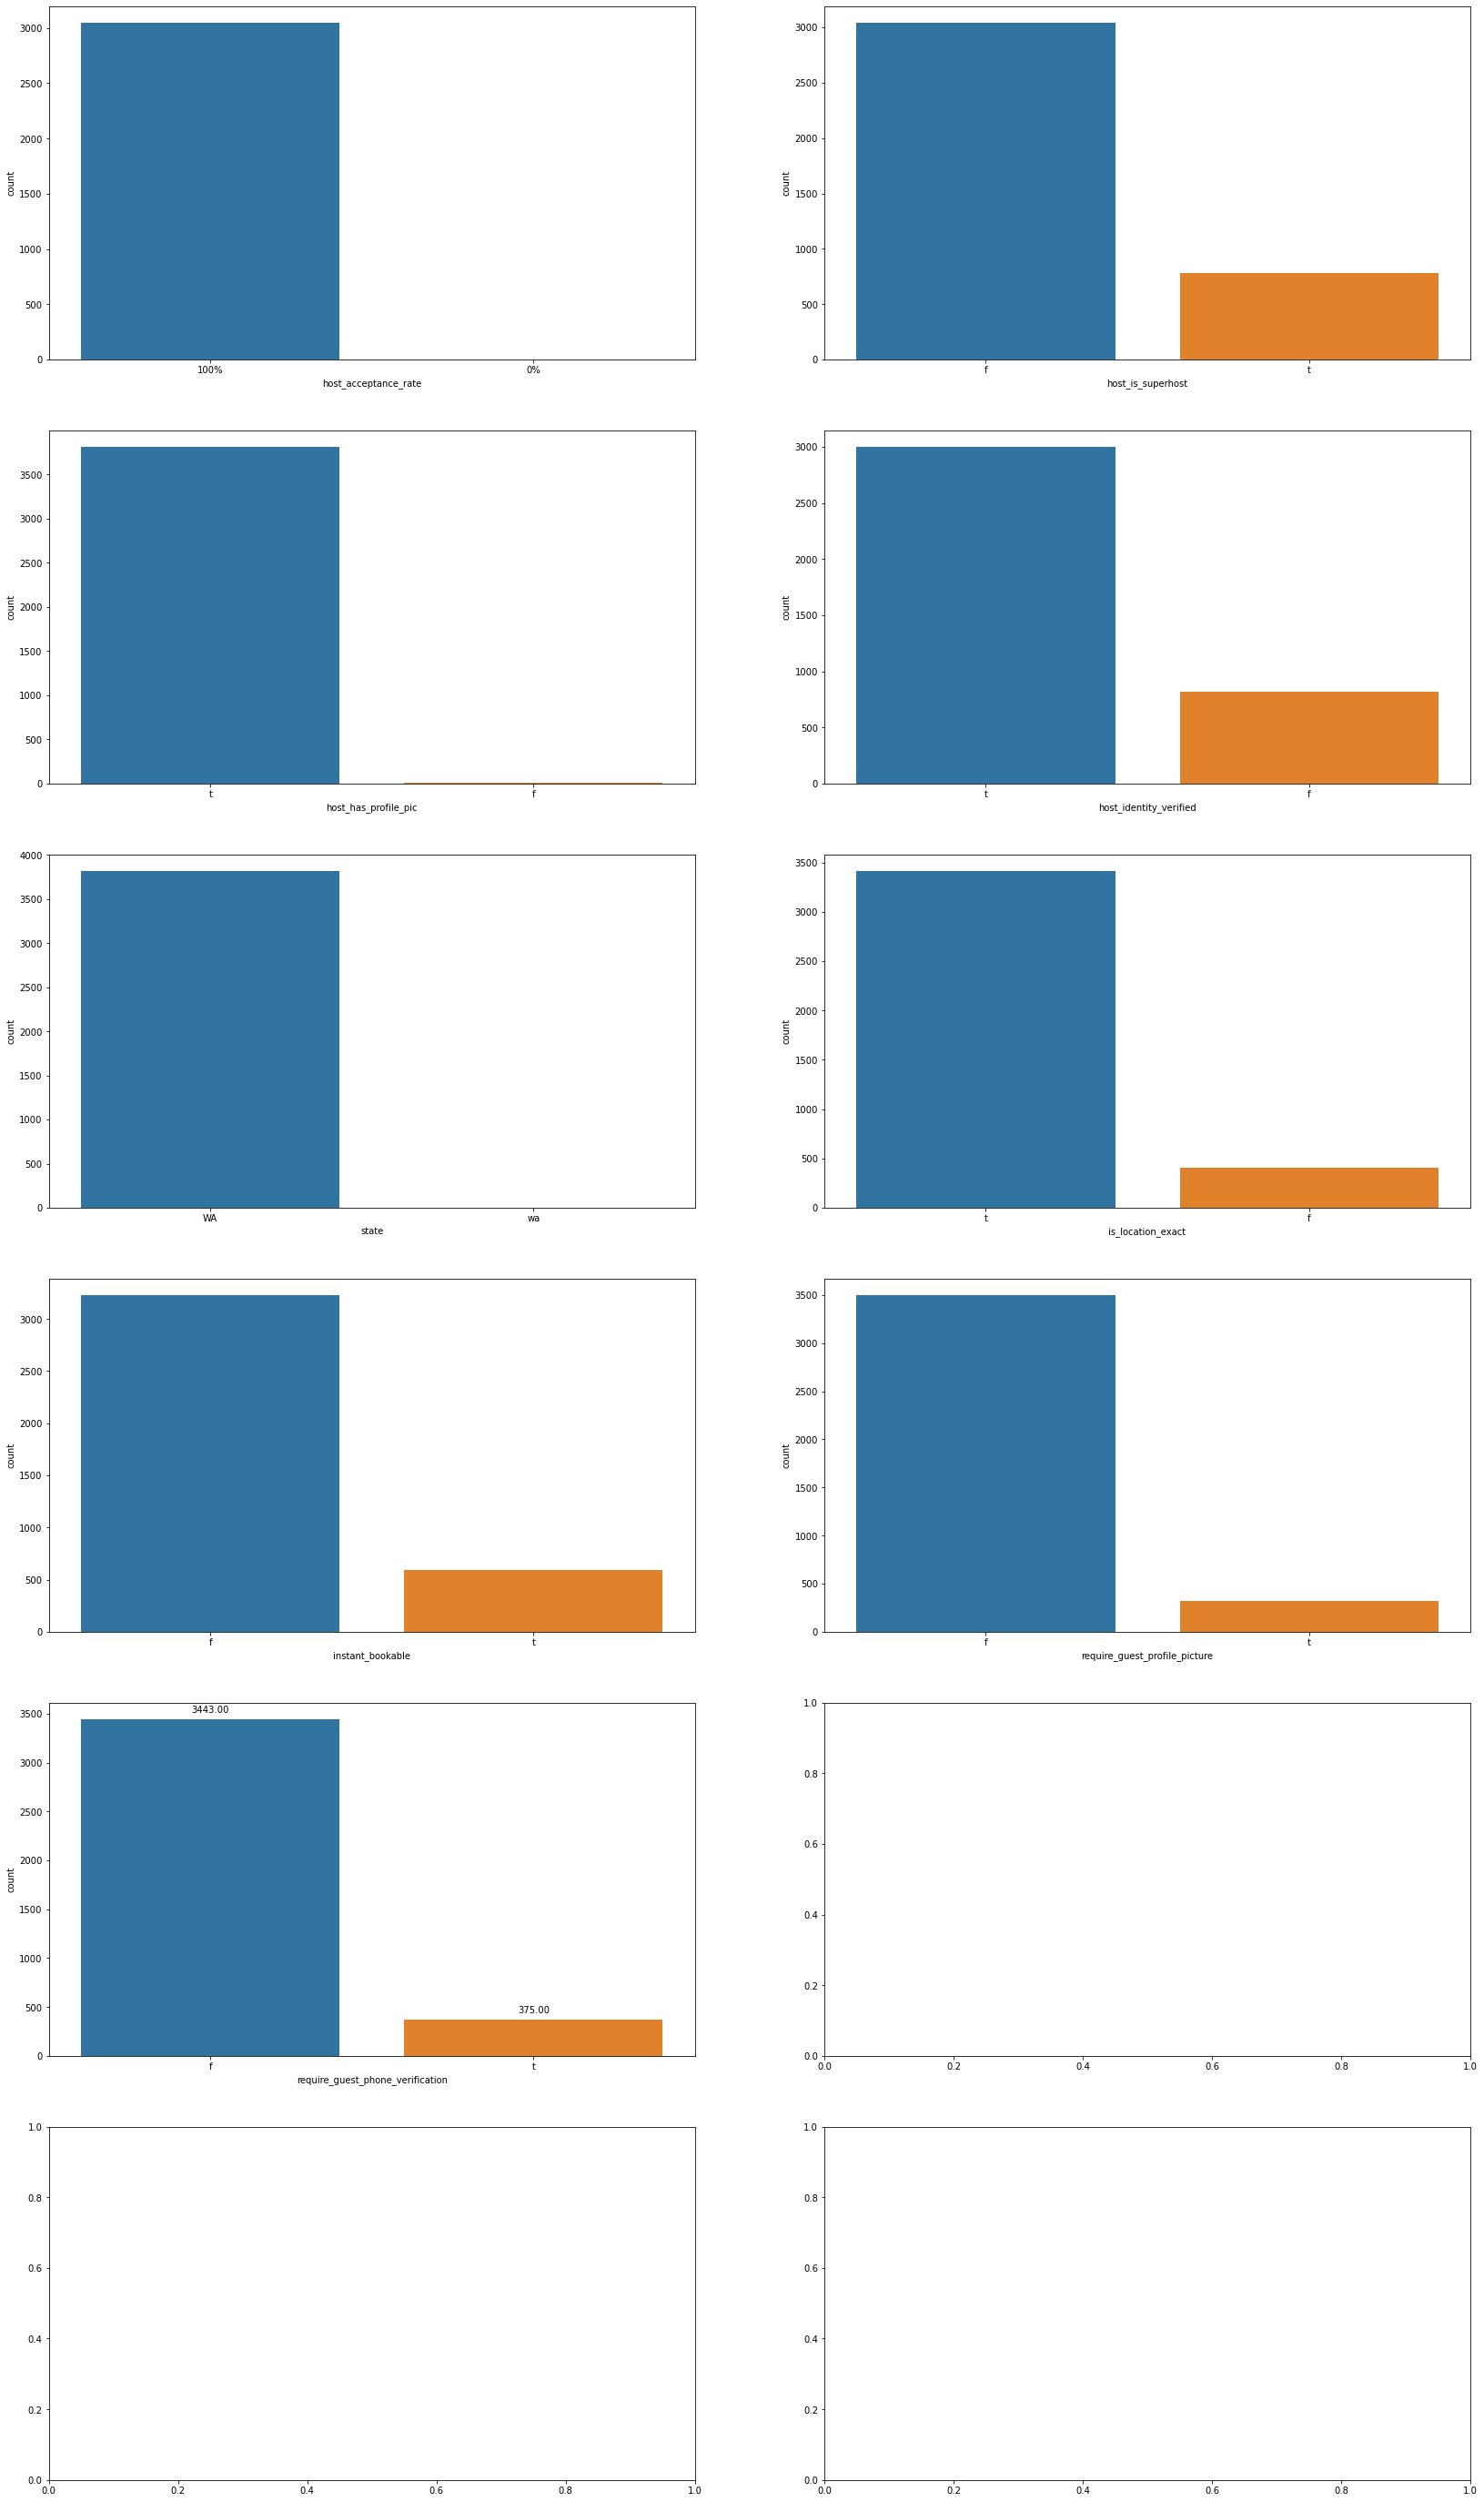

In [8]:
# If the column contains the same value,  that's invaluble data.
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
row = 6
col = 2
f, axes = plt.subplots(row, col, figsize=(28, 50))
row_count=0
col_count=0
for column in listings_unbalanced.columns:
    splot = sb.countplot(listings_dataFilter[column], ax = axes[row_count,col_count])
    col_count+=1
    if col_count > col-1:
        col_count=0
        row_count+=1
        
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext =     (0, 10), textcoords = 'offset points')

# Check the missing values in each column.


In [9]:
# Function to show the columns with missing values in descending order.
def show_missing_values(df):
    missing_vals = pd.DataFrame()
    filtered_predicator = []
    missing_vals['amount'] = df.isnull().sum().sort_values(ascending = False)
    missing_vals['ratio'] = round(missing_vals['amount']/len(df),2)
    return missing_vals[missing_vals['amount']>0].dropna()

In [10]:
show_missing_values(listings_dataFilter)

,amount,ratio
license,3818,1.00
square_feet,3721,0.97
monthly_price,2301,0.60
security_deposit,1952,0.51
weekly_price,1809,0.47
notes,1606,0.42
neighborhood_overview,1032,0.27
cleaning_fee,1030,0.27
transit,934,0.24
host_about,859,0.22


# Because our dataset only has 3818 rows, which is a quite small dataset. To keep data integrated, we only filter off those columns with more than 30% missing values.

In [11]:
# add columns with the ratio is over 0.3 to a list for later use.
series = show_missing_values(listings_dataFilter).iloc[:,1]
many_missings = [x for x, y in series.items() if y > 0.30]
many_missings

['license',
 'square_feet',
 'monthly_price',
 'security_deposit',
 'weekly_price',
 'notes']

In [12]:
listings_dataFilter = listings_dataFilter.drop(columns = many_missings)

# Collect all categorical data into a list called categorical_data.
# Collect all numerical data into a list called numerical_data.

In [15]:
numerical_data = []
categorical_data = []
for column in listings_dataFilter.columns:
    if listings_dataFilter[column].dtype == "object":
        categorical_data.append(column)
    else:
        numerical_data.append(column)

In [16]:
listings_dataFilter.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3295.000000,3045.000000,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,...,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000
mean,94.886798,99.967159,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,...,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919
std,11.866705,1.812201,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,...,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,5.893029,1.822348
min,17.000000,0.000000,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,...,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000
25%,98.000000,100.000000,1.000000,1.000000,47.609418,-122.354321,2.000000,1.000000,1.000000,1.000000,...,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.695000
50%,100.000000,100.000000,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,...,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.540000
75%,100.000000,100.000000,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,...,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000
max,100.000000,100.000000,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,...,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000


# Check the missing values of all numerical data 

In [17]:
show_missing_values(listings_dataFilter[numerical_data])

,amount,ratio
cleaning_fee,1030,0.27
host_acceptance_rate,773,0.20
review_scores_checkin,658,0.17
review_scores_accuracy,658,0.17
review_scores_value,656,0.17
review_scores_location,655,0.17
review_scores_cleanliness,653,0.17
review_scores_communication,651,0.17
review_scores_rating,647,0.17
reviews_per_month,627,0.16


# Check the missing values of all categorical data 

In [18]:
show_missing_values(listings_dataFilter[categorical_data])

,amount,ratio
neighborhood_overview,1032,0.27
transit,934,0.24
host_about,859,0.22
last_review,627,0.16
first_review,627,0.16
space,569,0.15
host_response_time,523,0.14
neighbourhood,416,0.11
medium_url,320,0.08
xl_picture_url,320,0.08


# Filling in the missing values
## KNN-based Missing Value Imputation for numerical data
## Using most-frequent values of the column to fill in the missing values of categorical data

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [24]:
# imputer = KNNImputer(n_neighbors=4)
imp_numerical = KNNImputer(missing_values=np.nan, n_neighbors=3)
imp_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [25]:
listings_dataFilter[numerical_data] = imp_numerical.fit_transform(listings_dataFilter[numerical_data])
listings_dataFilter[categorical_data] = imp_categorical.fit_transform(listings_dataFilter[categorical_data])